## Intro :

SVM (support vector machine) is a ***supervised*** learning algorithm that can be used both ***classification and regression***.

Consider there is a ***p dimensional data set***, the SVM model is a way to seperate these points as good as possible by generate a ***p-1 dimensional hyper plane***. (choose the hyperplane so that the distance from it to the nearest data point on each side is maximized. )


## Contents:

In this nb, we will demo basic applications of SVM, model tuning, and SVM kernel 

- applications
    - SVM.SVC (classification)
    - SVM.SVR (regression)
- Model tuning  : gamma / c
- kernel : linear / RBF / polynomial 






In [4]:
#cd analysis/ML_/doc/



SVM demo :

How SVM classify data via a optimal hyperplane 
that seperate data points and make the max margin





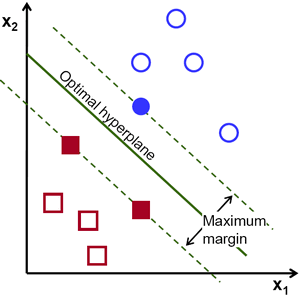

In [5]:
# credit : 
from IPython.display import Image
print ("""

SVM demo :

How SVM classify data via a optimal hyperplane 
that seperate data points and make the max margin


""")
Image(filename='svm.png')



## Ref :
- https://sadanand-singh.github.io/posts/svmpython/
- https://sadanand-singh.github.io/posts/svmmodels/

In [6]:
#cd analysis/ML_/doc/

In [7]:
# analysis library
import pandas as pd, numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
%pylab inline

# ML
from sklearn import svm, datasets

Populating the interactive namespace from numpy and matplotlib


## 0) Data prepare

In [8]:
# help function 


def get_data():
    iris = datasets.load_iris()
    X = iris.data[:, :2] # only take the first two features.
    y = iris.target
    return X,y

def plot_SVM(Z,subplot_id,title):
    plt.figure(figsize=(15, 5))
    plt.subplot(subplot_id)
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain_r, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.hot_r)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title('{}'.format(title))
    plt.show()


In [9]:
X,y = get_data()

In [11]:
#X[:,1:2]
#plt.m

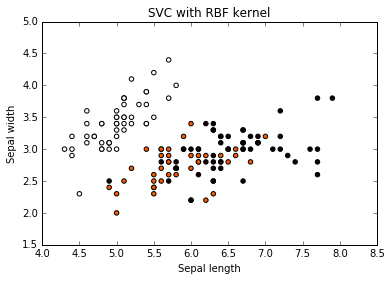

In [12]:
plt.scatter(X[:,:1],X[:,1:2],c=y,cmap=plt.cm.hot_r)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVC with RBF kernel')
plt.show()

## 1) Classification 

In [13]:
# prepare plot data 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

kernel_ : linear
subplot_id : 121


//anaconda/envs/g_dash/lib/python3.4/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/envs/g_dash/lib/python3.4/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


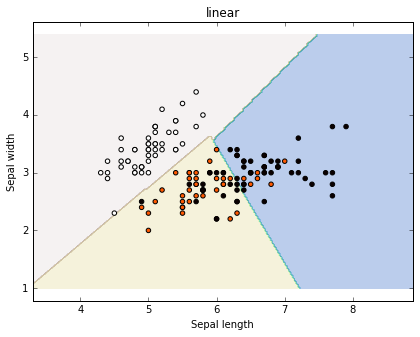

kernel_ : rbf
subplot_id : 122


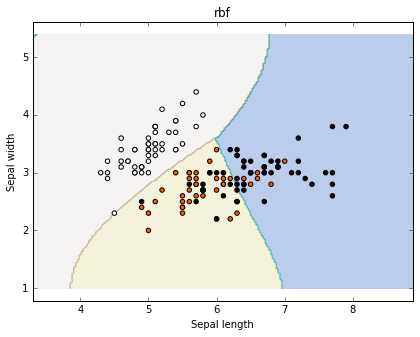

kernel_ : poly
subplot_id : 122


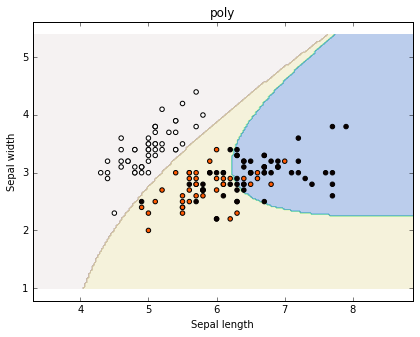

In [17]:
kernel_list = ['linear','rbf','poly']
subplot_list = [121,122,122]
C = 1.0 

for kernel_, subplot_id in zip(kernel_list,subplot_list):
    print ('kernel_ :', kernel_)
    print ('subplot_id :', subplot_id)
    svc = svm.SVC(kernel=kernel_, C=C, decision_function_shape='ovr').fit(X, y)
    Z = svc.predict(X_plot)
    Z = Z.reshape(xx.shape)
    plot_SVM(Z,subplot_id,kernel_)
    